## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Importing Data

In [159]:
df1 = pd.read_csv('train_ctrUa4K.csv')
df2 = pd.read_csv('test_lAUu6dG.csv')

In [160]:
len(df1)

614

In [161]:
len(df2)

367

In [162]:
len(df1) + len(df2)

981

### Lets now concat the 2 dataframes and check for null values! Imputing the values after concating will eleminate the "DATA LEAKAGE"

In [163]:
temp_df = pd.concat([df1,df2])
# temp_df = df1.copy()

In [164]:
temp_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Info on the data

In [165]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [166]:
temp_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


### Imputing Null values

In [167]:
temp_df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [168]:
temp_df['Gender'].fillna('Male',inplace=True) ## imputing Gender based on mode()

In [169]:
temp_df.ApplicantIncome.groupby(temp_df.Married).mean()

Married
No     4778.731988
Yes    5395.464342
Name: ApplicantIncome, dtype: float64

In [170]:
mar = []
for i,j in zip(temp_df.Married,temp_df.ApplicantIncome):
    if (i is np.nan) and (j>4778):
        mar.append('Yes')
    elif (i is np.nan) and (j <= 4778):
        mar.append('No')
    else:
        mar.append(i)

In [171]:
temp_df['Married'] = mar ## imputing Married based on income of applicant

In [172]:
# temp_df.loc[(temp_df.Dependents.isnull())&(temp_df.Married == 'No')]

In [173]:
### Imputing dependants value as 1 if married, else with the value of i
dep = []
for i,j in zip(temp_df.Dependents,temp_df.Married):
    if (i is np.nan) and (j == 'Yes'):
        dep.append('1')
    elif (i is np.nan) and (j == 'No'):
        dep.append('0')
    else:
        dep.append(i)

In [174]:
temp_df['Dependents'] = dep

In [175]:
temp_df.ApplicantIncome.groupby(temp_df.Self_Employed).mean()

Self_Employed
No     4892.030979
Yes    6912.579832
Name: ApplicantIncome, dtype: float64

In [176]:
se = []
for i,j in zip(temp_df.Self_Employed,temp_df.ApplicantIncome):
    if (i is np.nan) and (j > 4892):
        se.append('Yes')
    elif (i is np.nan) and (j <= 4892):
        se.append('No')
    else:
        se.append(i)

In [177]:
temp_df['Self_Employed'] = se ## imputing SE with Applicant income

In [178]:
temp_df.LoanAmount.median()

126.0

In [179]:
temp_df['LoanAmount'].fillna(126,axis=0,inplace=True) ## imputing with median()

In [180]:
temp_df.Loan_Amount_Term.median()

360.0

In [181]:
temp_df['Loan_Amount_Term'].fillna(360,axis=0,inplace=True) ## imputing with median()

In [182]:
temp_df.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [183]:
temp_df['Credit_History'].fillna(1,axis=0,inplace=True)

In [184]:
temp_df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

### We now split the data into train and test again after imputing null values! 

In [193]:
df = temp_df[:len(df1)]

In [258]:
test = temp_df.loc[temp_df.Loan_Status.isnull()]

In [259]:
# test['Loan_ID'] == df2.Loan_ID

In [260]:
test.drop('Loan_Status',axis=1,inplace=True) ## since we concatenated the 2 dfs, an extra column will be created ! 

### Info on our new data 

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [197]:
df.Dependents = df.Dependents.astype(str)

## Data Analysis & Feature Engineering 

Y    422
N    192
Name: Loan_Status, dtype: int64


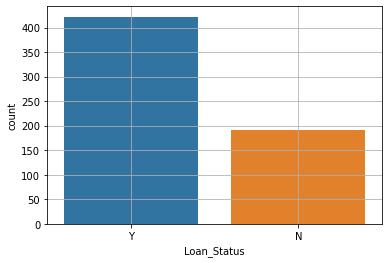

% values
Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


In [198]:

sns.countplot(df.Loan_Status)
print(df.Loan_Status.value_counts(normalize=False))
plt.grid()
plt.show()
print('% values')
print(df.Loan_Status.value_counts(normalize=True)*100)

### Inference : 32% of loan requests have been rejected

In [199]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Adding new feature "Total_family_income"

In [200]:
df['Total_family_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

### Mean / median / max / min of the income 

In [201]:
def mxmn(feature):
    print('max    : ',df[feature].max())
    print('mean   : ',df[feature].mean())
    print('median : ',df[feature].median())
    print('min    : ',df[feature].min())

In [202]:
mxmn('CoapplicantIncome')

max    :  41667.0
mean   :  1621.2457980271008
median :  1188.5
min    :  0.0


In [203]:
mxmn('ApplicantIncome')

max    :  81000
mean   :  5403.459283387622
median :  3812.5
min    :  150


In [204]:
mxmn('Total_family_income')

max    :  81000.0
mean   :  7024.705081414722
median :  5416.5
min    :  1442.0


In [205]:
ai = []
for i in df['ApplicantIncome']:
    if i < 3812:
        ai.append('Poor')
    elif 3812<=i<5403:
        ai.append('MiddleClass')
    elif i >= 5403:
        ai.append('Rich')

In [206]:
df['ApplicantIncome_Category'] = ai

In [207]:
df['ApplicantIncome_Category'].value_counts()

Poor           306
Rich           176
MiddleClass    132
Name: ApplicantIncome_Category, dtype: int64

In [208]:
fi = []
for i in df['Total_family_income']:
    if i < 5416:
        fi.append('Poor')
    elif 5416<=i<7024:
        fi.append('MiddleClass')
    elif i >= 7024:
        fi.append('Rich')

In [209]:
df['Total_family_income_Category'] = fi

### Distributions and outliers

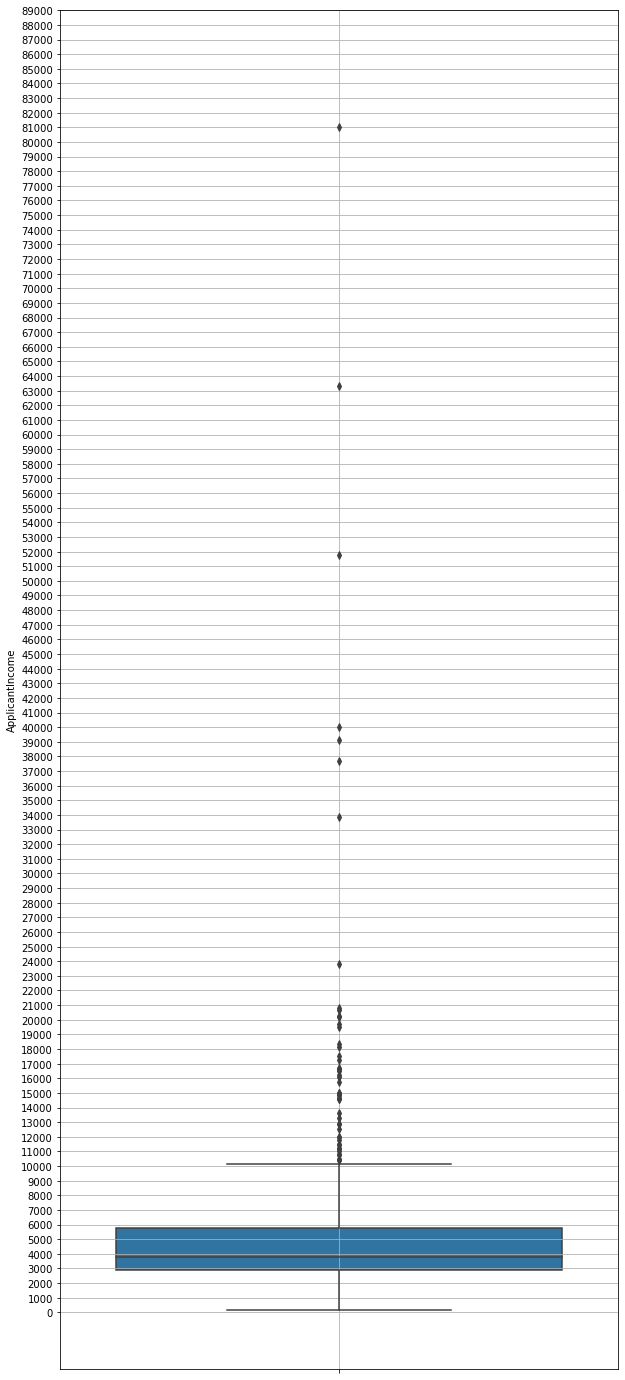

In [210]:
plt.figure(figsize=(10,25))
sns.boxplot(y = df.ApplicantIncome)
plt.grid()
plt.yticks(np.arange(0,90000,1000))
plt.show()

### Feature Engineering is completed, Let us now analyse the data

In [121]:
appin_ls = pd.DataFrame(df.Loan_Status.groupby(df.ApplicantIncome_Category).value_counts(normalize=False))

In [116]:
pr = appin_ls['Loan_Status']

In [118]:
appin_ls['Percentage'] = round(pr*100,2)

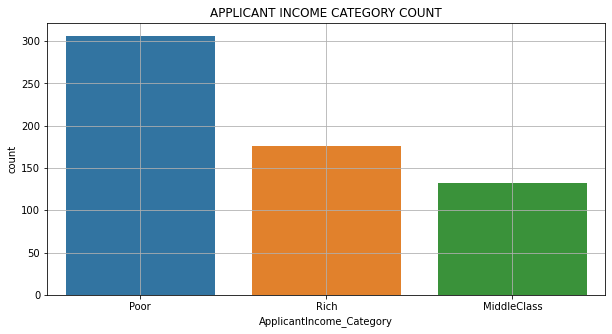







                                      Loan_Status  Percentage
ApplicantIncome_Category Loan_Status                         
MiddleClass              Y                     91       68.94
                         N                     41       31.06
Poor                     Y                    210       68.63
                         N                     96       31.37
Rich                     Y                    121       68.75
                         N                     55       31.25


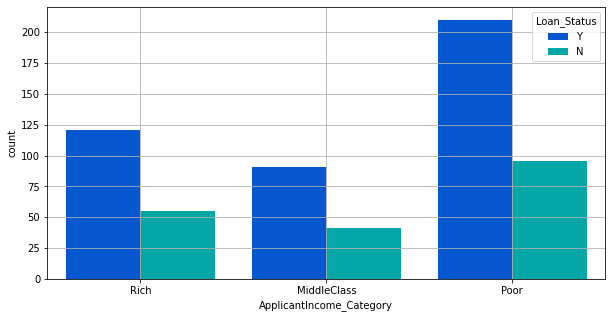

In [119]:
## Applicant Income category and loan status
plt.figure(figsize=(10,5))
sns.countplot(df.ApplicantIncome_Category,order=df.ApplicantIncome_Category.value_counts().index)
plt.grid()
plt.title('APPLICANT INCOME CATEGORY COUNT')
plt.show()
print('\n\n')
plt.figure(figsize=(10,5))
sns.countplot(df.ApplicantIncome_Category,hue=df.Loan_Status,saturation=0.95,palette='winter')
print('\n\n')
print(appin_ls)
plt.grid()
plt.show()

### Inferenece : Poor people apply for loans significantly higher than Middle class and rich, But the ratio of loans getting rejected to loans getting approved does not change. 
### Customers can belong to any tier, 69% of the rich, Poor and MC customers are being approved for loans while the remaining 31% are not been given loans! 

### Let's check the Total family income

In [122]:
famin_ls = pd.DataFrame(df.Loan_Status.groupby(df.Total_family_income_Category).value_counts(normalize=False))

In [121]:
pr = famin_ls['Loan_Status']

In [123]:
famin_ls['Percentage'] = pr*100

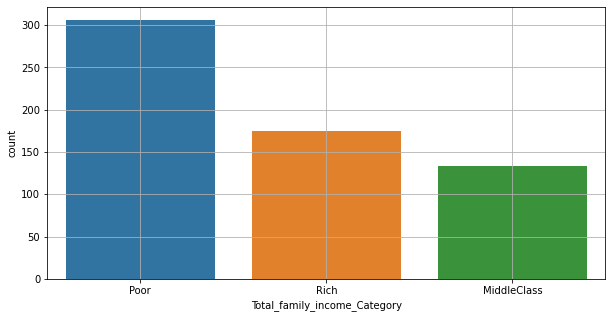




                                          Loan_Status  Percentage
Total_family_income_Category Loan_Status                         
MiddleClass                  Y                     96   72.180451
                             N                     37   27.819549
Poor                         Y                    208   67.973856
                             N                     98   32.026144
Rich                         Y                    118   67.428571
                             N                     57   32.571429


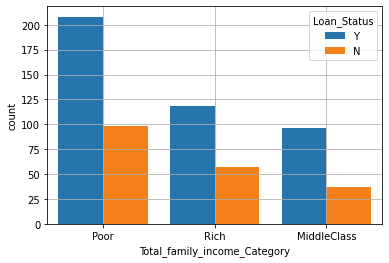

In [127]:
## Total family Income category and loan status
plt.figure(figsize=(10,5))
sns.countplot(df.Total_family_income_Category,order=df.Total_family_income_Category.value_counts().index)
plt.grid()
plt.show()


sns.countplot(df.Total_family_income_Category,order=df.Total_family_income_Category.value_counts().index,hue=df.Loan_Status,saturation=0.9)
print('\n\n')
print(famin_ls)
plt.grid()
plt.show()

### Inference : We can infer that only 27% of the middle class family (Total family income between 5416 and 7024) loan are being rejected. On the other hand, 32% of both rich family ( Total Income > 7024) and Poor family's (total income < 5416) loan have been rejected.
###  *Probability of a loan getting rejected for the rich and poor are higher than the Middle class!* 
### (or in other words)
### *Probability of getting loans is higher for the middle class*

### Is applicant's income playing a major factor for loans to be approved / rejected ?

   ApplicantIncome Loan_Status
0      5446.078125           N
1      5384.068720           Y


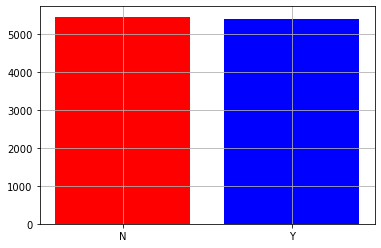

In [128]:
api_ls = pd.DataFrame(df.ApplicantIncome.groupby(df.Loan_Status).mean())
api_ls['Loan_Status'] = api_ls.index
api_ls.index = np.arange(0,len(api_ls))

plt.bar(api_ls.Loan_Status,api_ls.ApplicantIncome,color = ['r','b'])
plt.grid()
print(api_ls)
plt.show()

### Inference : Loan is not rejected based on the applicant's Income 

### Total family income and property area! 

               Total_family_income
Property_Area                     
Rural                  7199.620782
Semiurban              6812.394850
Urban                  7114.598020


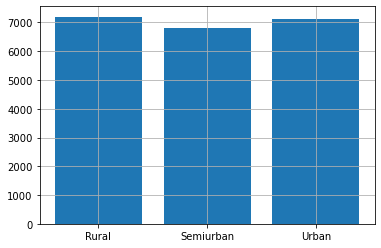

In [142]:
tfi_pa = pd.DataFrame(df.Total_family_income.groupby(df.Property_Area).mean())
plt.bar(tfi_pa.index,tfi_pa.Total_family_income)
plt.grid()
print(tfi_pa)
plt.show()

In [133]:
prop_status = pd.DataFrame(df.Loan_Status.groupby(df.Property_Area).value_counts(normalize=False))

In [132]:
pr = prop_status['Loan_Status']

In [134]:
prop_status['Percentage'] = pr*100

In [137]:
prop_status

Loan_Status  Percentage
Property_Area Loan_Status                         
Rural         Y                    110   61.452514
              N                     69   38.547486
Semiurban     Y                    179   76.824034
              N                     54   23.175966
Urban         Y                    133   65.841584
              N                     69   34.158416

### Inference :  We can infer that only 23% of loans from semi urban customers are being rejected and 38% of rural customers are being rejected. 
### or, in other words
### Probability of loan getting rejected is higher for a Rural customer

In [146]:
gen_ls = pd.DataFrame(df.Loan_Status.groupby(df.Gender).value_counts(normalize=False)).sort_index()

In [145]:
pr = gen_ls['Loan_Status']

In [147]:
gen_ls['Percentage'] = pr*100




                    Loan_Status  Percentage
Gender Loan_Status                         
Female N                     37   33.035714
       Y                     75   66.964286
Male   N                    155   30.876494
       Y                    347   69.123506


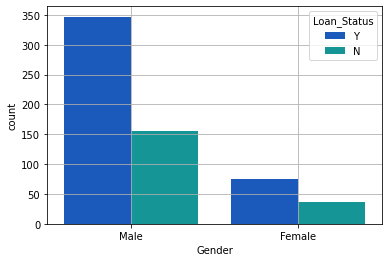

In [148]:
## count of loan status with hue gender
sns.countplot(df.Gender,palette='winter',hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(gen_ls)
# print(df.Loan_Status.value_counts(),'\n')
plt.show()

### Inference : we can infer that 35% of loans are being rejected for females and only 30% of loans are rejected for male

In [152]:
edu_ls = pd.DataFrame(df.Loan_Status.groupby(df.Education).value_counts(normalize=False))

In [151]:
pr = edu_ls['Loan_Status']

In [153]:
edu_ls['Percentage'] = pr*100




                          Loan_Status  Percentage
Education    Loan_Status                         
Graduate     Y                    340   70.833333
             N                    140   29.166667
Not Graduate Y                     82   61.194030
             N                     52   38.805970 



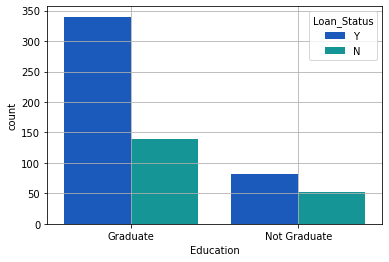

In [154]:
## count of loan status with hue Education
sns.countplot(df.Education,palette='winter',hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(edu_ls,'\n')
plt.show()

### Inference : almost 39% of loans for Non Graduates are being rejected but only 29% of the loans for Graduates are Rejected, which makes sense! 

In [157]:
self_ls = pd.DataFrame(df.Loan_Status.groupby(df.Self_Employed).value_counts(normalize=False))

In [156]:
pr = self_ls['Loan_Status']

In [158]:
self_ls['Percentage'] = pr*100




                           Loan_Status  Percentage
Self_Employed Loan_Status                         
No            Y                    360   68.965517
              N                    162   31.034483
Yes           Y                     62   67.391304
              N                     30   32.608696 



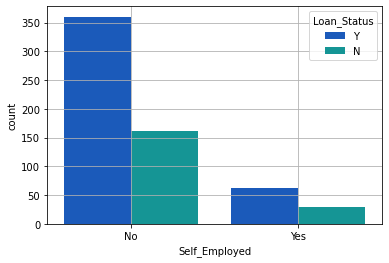

In [159]:
## count of loan status with hue Self_Employed
sns.countplot(df.Self_Employed,palette='winter',hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(self_ls,'\n')
plt.show()

In [162]:
cred_ls = pd.DataFrame(df.Loan_Status.groupby(df.Credit_History).value_counts(normalize=False))

In [161]:
pr = cred_ls['Loan_Status']

In [163]:
cred_ls['Percentage'] = pr*100




                            Loan_Status  Percentage
Credit_History Loan_Status                         
0.0            N                     82   92.134831
               Y                      7    7.865169
1.0            Y                    415   79.047619
               N                    110   20.952381 



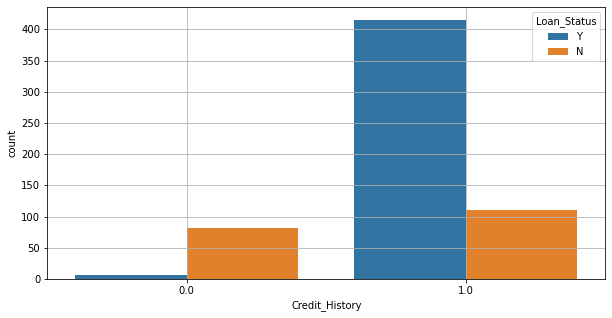

In [164]:
plt.figure(figsize=(10,5))
sns.countplot(df.Credit_History,hue=df.Loan_Status)
print('\n\n')
print(cred_ls,'\n')
plt.grid()
plt.show()

### Inference : 92% of the customers whose credit history marked as 0 are being rejected for loans and only 8% of those customers are approved loans. (20% of customers whose credit history marked as 1 are being rejected for loans too! ) again, makes sense

In [236]:
dep_ls = pd.DataFrame(df.Loan_Status.groupby(df.Dependents).value_counts(normalize=False))

In [235]:
pr = dep_ls['Loan_Status']

In [237]:
dep_ls['Percentage'] = pr*100

In [239]:
# dep_ls




                        Loan_Status  Percentage
Dependents Loan_Status                         
0          Y                    242   68.945869
           N                    109   31.054131
1          Y                     71   63.963964
           N                     40   36.036036
2          Y                     76   75.247525
           N                     25   24.752475
3+         Y                     33   64.705882
           N                     18   35.294118 



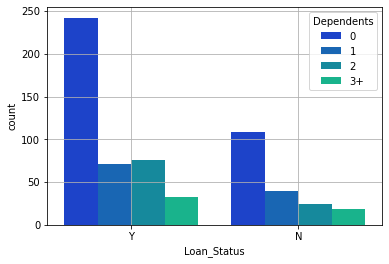

In [240]:
## count of loan status with hue dependents
sns.countplot(df.Loan_Status,palette='winter',hue=df.Dependents)
plt.grid()
print('\n\n')
print(dep_ls,'\n')
plt.show()

### Inference : 36% of customers with 1 dependent and 35% customers with more than 3 dependents have been rejected for loans. Only 25% of customers with 2 dependents have been rejected for loans

### Descriptive

In [241]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.680782,84.123205,9.0,100.25,126.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0
Total_family_income,614.0,7024.705081,6458.663872,1442.0,4166.00,5416.5,7521.75,81000.0


In [242]:
gen_appin = pd.DataFrame(df.ApplicantIncome.groupby(df.Gender).mean())
gen_appin

,ApplicantIncome
Gender,
Female,4643.473214
Male,5573.017928


### Inference : Male customers have more income than female customers

In [243]:
gen_loanamt = pd.DataFrame(df.LoanAmount.groupby(df.Gender).mean())
gen_loanamt['Percentage'] = (gen_loanamt.LoanAmount/gen_loanamt.LoanAmount.sum())*100
gen_loanamt

,LoanAmount,Percentage
Gender,,
Female,126.678571,45.798655
Male,149.920319,54.201345


### Inference : 55% of the total money given for loan are for male customers and 45% are for female customers.  In other words, Male customers borrow more money than female customers

1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64


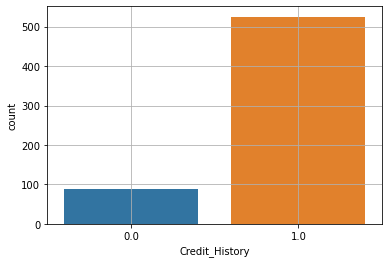


% values
1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [246]:
sns.countplot(df.Credit_History)
print(df.Credit_History.value_counts(normalize=True))
plt.grid()
plt.show()
print('\n% values')
print(df.Credit_History.value_counts(normalize=False))

### Inference : 14% of the customers have credit history marked 0.

In [249]:
lat_ls = pd.DataFrame(df.Loan_Status.groupby(df.Loan_Amount_Term).value_counts(normalize=False))

In [248]:
pr = lat_ls['Loan_Status']

In [250]:
lat_ls['Percentage'] = pr*100

In [260]:
df.loc[df.Loan_Amount_Term == 84.0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_family_income,ApplicantIncome_Category,Total_family_income_Category
313,LP002008,Male,Yes,2,Graduate,Yes,5746,0.0,144.0,84.0,1.0,Rural,Y,5746.0,Rich,MiddleClass
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,4239.0,Poor,Poor
575,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.0,84.0,1.0,Urban,Y,3620.0,Poor,Poor
585,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.0,84.0,1.0,Rural,N,7283.0,MiddleClass,Rich





                              Loan_Status  Percentage
Loan_Amount_Term Loan_Status                         
12.0             Y                      1  100.000000
36.0             N                      2  100.000000
60.0             Y                      2  100.000000
84.0             Y                      3   75.000000
                 N                      1   25.000000
120.0            Y                      3  100.000000
180.0            Y                     29   65.909091
                 N                     15   34.090909
240.0            Y                      3   75.000000
                 N                      1   25.000000
300.0            Y                      8   61.538462
                 N                      5   38.461538
360.0            Y                    367   69.771863
                 N                    159   30.228137
480.0            N                      9   60.000000
                 Y                      6   40.000000 



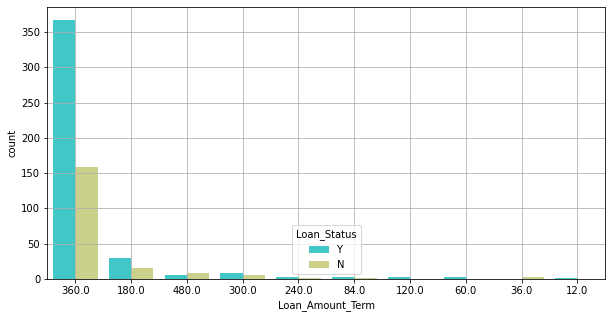

In [251]:
plt.figure(figsize=(10,5))
sns.countplot(df.Loan_Amount_Term,palette='rainbow',order=df.Loan_Amount_Term.value_counts().index,hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(lat_ls,'\n')
plt.show()

### Inference : 
1. Loans have never been rejected for 12 (1 year), 60 (5 years), 120 (10 years) loan amount terms!  
2. the 36 month period loan have never been approved! 

In [292]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_family_income,ApplicantIncome_Category,Total_family_income_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,5849.0,Rich,MiddleClass
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,MiddleClass,MiddleClass
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Poor,Poor
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Poor,Poor
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Rich,MiddleClass



### Total family income, Loan amount and the Loan status

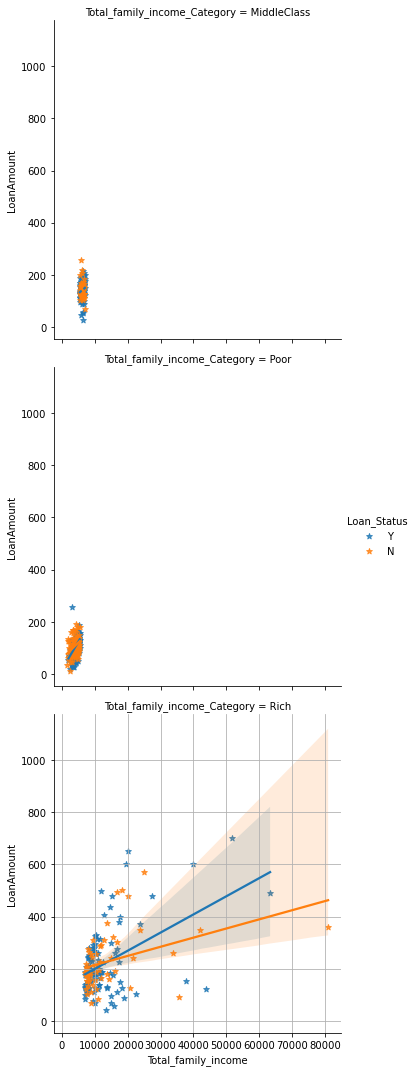

In [300]:
sns.lmplot(data = df, x = 'Total_family_income', y = 'LoanAmount',height=5,markers='*',hue='Loan_Status',row='Total_family_income_Category')
plt.grid()
plt.show()

### Total family income, Loan amount, and Loan status based on Education

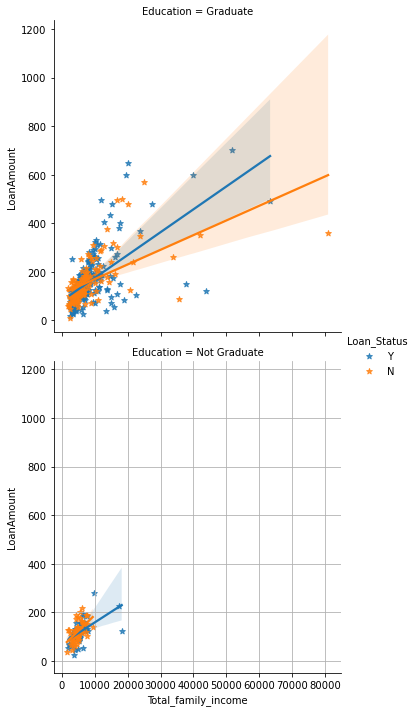

Mean value


ApplicantIncome  CoapplicantIncome  LoanAmount  \
Education    Loan_Status                                                   
Graduate     N                6114.514286        2111.028571  159.871429   
             Y                5751.576471        1555.423294  150.429412   
Not Graduate N                3646.442308        1249.903846  122.596154   
             Y                3860.256098        1293.439024  116.402439   

                          Loan_Amount_Term  Credit_History  \
Education    Loan_Status                                     
Graduate     N                  350.571429        0.592857   
             Y                  342.600000        0.982353   
Not Graduate N                  328.384615        0.519231   
             Y                  336.585366        0.987805   

                          Total_family_income  
Education    Loan_Status                       
Graduate     N                    8225.542857  
             Y                    7306.999765  
Not Graduate N                    4896.346154  
             Y                    5153.695122

In [321]:
sns.lmplot(data = df, x = 'Total_family_income', y = 'LoanAmount',height=5,markers='*',hue='Loan_Status',row='Education')
plt.grid()
plt.show()
print('Mean value')
pd.DataFrame(df.groupby(['Education','Loan_Status']).mean())#['Total_family_income'])

### Total family income, Loan amount, and Loan status based on Self Employment

In [353]:
df.groupby(['Self_Employed','Loan_Status']).count()['Total_family_income']

Self_Employed  Loan_Status
No             N              162
               Y              360
Yes            N               30
               Y               62
Name: Total_family_income, dtype: int64

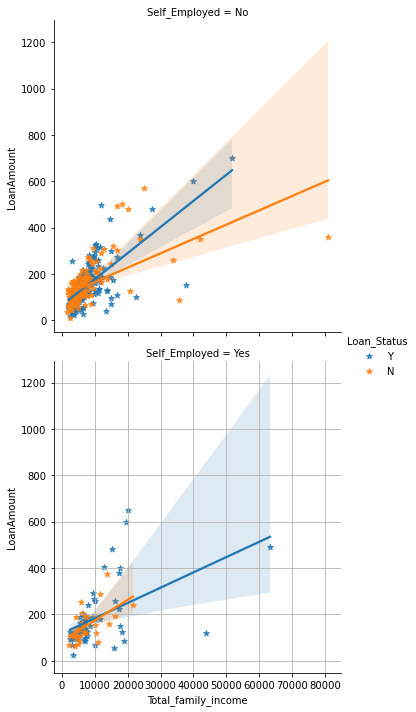

Loan_ID
Self_Employed Loan_Status         
No            N                162
              Y                360
Yes           N                 30
              Y                 62

In [357]:
sns.lmplot(data = df, x = 'Total_family_income', y = 'LoanAmount',height=5,markers='*',hue='Loan_Status',row='Self_Employed')
plt.grid()
plt.show()
pd.DataFrame(df.groupby(['Self_Employed','Loan_Status']).count()['Loan_ID'])

In [122]:
lat_loanamt = pd.DataFrame(df.LoanAmount.groupby(df.Loan_Amount_Term).mean())
# lat_loanamt

<AxesSubplot:>

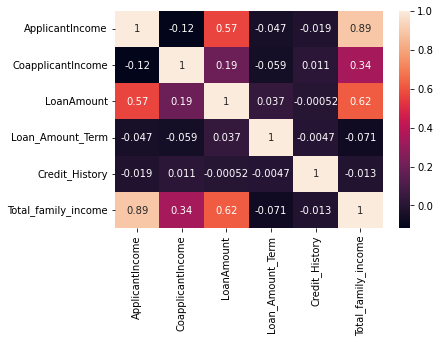

In [123]:
sns.heatmap(df.corr(),annot=True)

### Inferences: 
1. Applicant Income and Total Family income are 89% Positively correlated 
2. Total Family income and Loan amount are 62% Positively corelated
3. Loan amount and Applicant Income are 57% positively corelated. 
4. Loan amount and co applicant income are 20% Positively corelated

### Machine Learning models

In [211]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_family_income,ApplicantIncome_Category,Total_family_income_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,5849.0,Rich,MiddleClass
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,MiddleClass,MiddleClass
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Poor,Poor
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Poor,Poor
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Rich,MiddleClass


In [212]:
ml = df.copy()

In [213]:
ml.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_family_income,ApplicantIncome_Category,Total_family_income_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,5849.0,Rich,MiddleClass
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,MiddleClass,MiddleClass
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Poor,Poor
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Poor,Poor
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Rich,MiddleClass


In [214]:
gen = []
for i in ml.Gender:
    if i == 'Male':
        gen.append(1)
    else:
        gen.append(0)
ml['Gender'] = gen

In [215]:
mar = []
for i in ml.Married:
    if i == 'Yes':
        mar.append(1)
    else:
        mar.append(0)
ml['Married'] = mar

In [216]:
edu = []
for i in ml.Education:
    if i == 'Graduate':
        edu.append(1)
    else:
        edu.append(0)
ml['Education'] = edu

In [217]:
se = []
for i in ml.Self_Employed:
    if i == 'Graduate':
        se.append(1)
    else:
        se.append(0)
ml['Self_Employed'] = se

In [218]:
tfi =[]
for i in ml.Total_family_income_Category:
    if i == 'Poor':
        tfi.append(1)
    elif i == 'Rich':
        tfi.append(2)
    elif i == 'MiddleClass':
        tfi.append(3)
ml['Total_family_income_Category'] = tfi

In [219]:
ml.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [220]:
pa = []
for i in ml.Property_Area:
    if i == 'Semiurban':
        pa.append(1)
    elif i == 'Urban':
        pa.append(2)
    elif i == 'Rural':
        pa.append(3)
ml['Property_Area'] = pa

In [221]:
ls = []
for i in ml.Loan_Status:
    if i == 'Y':
        ls.append(1)        
    else:
        ls.append(0)
ml['Loan_Status'] = ls

In [222]:
dp = []
for i in ml.Dependents:
    if i == '0':
        dp.append(0)
    elif i  == '1':
        dp.append(1)
    elif i == '2':
        dp.append(2)
    elif i == '3+':
        dp.append(3)
ml['Dependents'] = dp

In [223]:
ml.drop('Loan_ID',axis=1,inplace=True)

In [224]:

ml.drop('ApplicantIncome_Category',axis=1,inplace=True) 

In [225]:
ml.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_family_income,Total_family_income_Category
0,1,0,0,1,0,5849,0.0,126.0,360.0,1.0,2,1,5849.0,3
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0,6091.0,3
2,1,1,0,1,0,3000,0.0,66.0,360.0,1.0,2,1,3000.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,3


In [226]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        614 non-null    int64  
 1   Married                       614 non-null    int64  
 2   Dependents                    614 non-null    int64  
 3   Education                     614 non-null    int64  
 4   Self_Employed                 614 non-null    int64  
 5   ApplicantIncome               614 non-null    int64  
 6   CoapplicantIncome             614 non-null    float64
 7   LoanAmount                    614 non-null    float64
 8   Loan_Amount_Term              614 non-null    float64
 9   Credit_History                614 non-null    float64
 10  Property_Area                 614 non-null    int64  
 11  Loan_Status                   614 non-null    int64  
 12  Total_family_income           614 non-null    float64
 13  Total

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [228]:
x = ml.drop('Loan_Status',axis=1)
y = ml.Loan_Status

In [229]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15,random_state=43)

In [230]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
cat = CatBoostClassifier(verbose=False)
lgb = LGBMClassifier()

Train metrics :

Train Accuracy score :  0.8080614203454894

Train Conf. Matrix :

 [[ 79  84]
 [ 16 342]]

Train Class. Report :

               precision    recall  f1-score   support

           0       0.83      0.48      0.61       163
           1       0.80      0.96      0.87       358

    accuracy                           0.81       521
   macro avg       0.82      0.72      0.74       521
weighted avg       0.81      0.81      0.79       521

-------------------------------------------------------------------------------- 

Test Metrics :




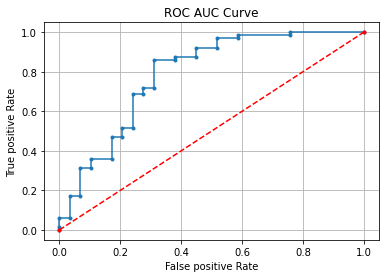

Test accuracy score :  0.8172043010752689
Roc auc score : 0.787176724137931

Test conf. matrix :

 [[14 15]
 [ 2 62]]

Test Class. Report :

               precision    recall  f1-score   support

           0       0.88      0.48      0.62        29
           1       0.81      0.97      0.88        64

    accuracy                           0.82        93
   macro avg       0.84      0.73      0.75        93
weighted avg       0.83      0.82      0.80        93



In [231]:
## train scores
lr.fit(xtrain,ytrain)
lr_train_pred = lr.predict(xtrain)
lr_train_acc = accuracy_score(ytrain,lr_train_pred)
lr_train_cm = confusion_matrix(ytrain,lr_train_pred)
lr_train_cr = classification_report(ytrain,lr_train_pred)
print('Train metrics :\n')
print('Train Accuracy score : ',lr_train_acc)
print('\nTrain Conf. Matrix :\n\n',lr_train_cm)
print('\nTrain Class. Report :\n\n',lr_train_cr)
print('--'*40,'\n')
print('Test Metrics :\n\n')
##test scores
lr_test_pred = lr.predict(xtest)
lr_test_pp = lr.predict_proba(xtest)
lr_test_pp = lr_test_pp[:,1]
##plotting ROC_CURVE
fpr,tpr,thresh = roc_curve(ytest,lr_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',color='r',marker='.')
plt.grid()
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC AUC Curve')
plt.show()
lr_test_acc = accuracy_score(ytest,lr_test_pred)
lr_test_cm = confusion_matrix(ytest,lr_test_pred)
lr_test_cr = classification_report(ytest,lr_test_pred)
lr_test_rocauc = roc_auc_score(ytest,lr_test_pp)
print('Test accuracy score : ',lr_test_acc)
print('Roc auc score :',lr_test_rocauc)
print('\nTest conf. matrix :\n\n',lr_test_cm)
print('\nTest Class. Report :\n\n',lr_test_cr)

Train metrics :

Train Accuracy score :  0.7428023032629558

Train Conf. Matrix :

 [[ 54 109]
 [ 25 333]]

Train Class. Report :

               precision    recall  f1-score   support

           0       0.68      0.33      0.45       163
           1       0.75      0.93      0.83       358

    accuracy                           0.74       521
   macro avg       0.72      0.63      0.64       521
weighted avg       0.73      0.74      0.71       521



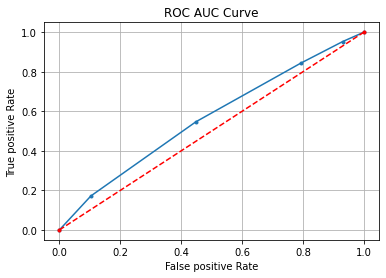

-------------------------------------------------------------------------------- 

Test Metrics :


Test accuracy score :  0.6451612903225806
roc_auc score : 0.5638469827586207

Test conf. matrix :

 [[ 6 23]
 [10 54]]

Test Class. Report :

               precision    recall  f1-score   support

           0       0.38      0.21      0.27        29
           1       0.70      0.84      0.77        64

    accuracy                           0.65        93
   macro avg       0.54      0.53      0.52        93
weighted avg       0.60      0.65      0.61        93



In [232]:
## train scores
kn.fit(xtrain,ytrain)
kn_train_pred = kn.predict(xtrain)
kn_train_acc = accuracy_score(ytrain,kn_train_pred)
kn_train_cm = confusion_matrix(ytrain,kn_train_pred)
kn_train_cr = classification_report(ytrain,kn_train_pred)
print('Train metrics :\n')
print('Train Accuracy score : ',kn_train_acc)
print('\nTrain Conf. Matrix :\n\n',kn_train_cm)
print('\nTrain Class. Report :\n\n',kn_train_cr)
##test scores
kn_test_pred = kn.predict(xtest)
kn_test_pp = kn.predict_proba(xtest)
kn_test_pp = kn_test_pp[:,1]
##plotting ROC_CURVE
fpr,tpr,thresh = roc_curve(ytest,kn_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',color='r',marker='.')
plt.grid()
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC AUC Curve')
plt.show()
kn_test_acc = accuracy_score(ytest,kn_test_pred)
kn_test_cm = confusion_matrix(ytest,kn_test_pred)
kn_test_cr = classification_report(ytest,kn_test_pred)
kn_test_rocauc = roc_auc_score(ytest,kn_test_pp)
print('--'*40,'\n')
print('Test Metrics :\n\n')
print('Test accuracy score : ',kn_test_acc)
print('roc_auc score :',kn_test_rocauc)
print('\nTest conf. matrix :\n\n',kn_test_cm)
print('\nTest Class. Report :\n\n',kn_test_cr)

Train metrics :

Train Accuracy score :  1.0

Train Conf. Matrix :

 [[163   0]
 [  0 358]]

Train Class. Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       358

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521

-------------------------------------------------------------------------------- 

Test Metrics :


Test accuracy score :  0.6666666666666666
roc auc score : 0.6635237068965517

Test conf. matrix :

 [[19 10]
 [21 43]]

Test Class. Report :

               precision    recall  f1-score   support

           0       0.47      0.66      0.55        29
           1       0.81      0.67      0.74        64

    accuracy                           0.67        93
   macro avg       0.64      0.66      0.64        93
weighted avg       0.71      0.67      0.

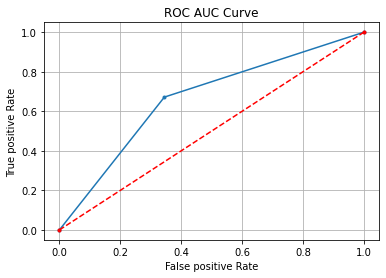

In [233]:
## train scores
dt.fit(xtrain,ytrain)
dt_train_pred = dt.predict(xtrain)
dt_train_acc = accuracy_score(ytrain,dt_train_pred)
dt_train_cm = confusion_matrix(ytrain,dt_train_pred)
dt_train_cr = classification_report(ytrain,dt_train_pred)
print('Train metrics :\n')
print('Train Accuracy score : ',dt_train_acc)
print('\nTrain Conf. Matrix :\n\n',dt_train_cm)
print('\nTrain Class. Report :\n\n',dt_train_cr)
##test scores
dt_test_pred = dt.predict(xtest)
dt_test_pp = dt.predict_proba(xtest)
dt_test_pp = dt_test_pp[:,1]
##plotting ROC_CURVE
fpr,tpr,thresh = roc_curve(ytest,dt_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',color='r',marker='.')
plt.grid()
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC AUC Curve')
dt_test_acc = accuracy_score(ytest,dt_test_pred)
dt_test_cm = confusion_matrix(ytest,dt_test_pred)
dt_test_cr = classification_report(ytest,dt_test_pred)
dt_test_rocauc = roc_auc_score(ytest,dt_test_pp)
print('--'*40,'\n')
print('Test Metrics :\n\n')
print('Test accuracy score : ',dt_test_acc)
print('roc auc score :',dt_test_rocauc)
print('\nTest conf. matrix :\n\n',dt_test_cm)
print('\nTest Class. Report :\n\n',dt_test_cr)

Train metrics :

Train Accuracy score :  1.0

Train Conf. Matrix :

 [[163   0]
 [  0 358]]

Train Class. Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       358

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521

-------------------------------------------------------------------------------- 

Test Metrics :


Test accuracy score :  0.7741935483870968
roc auc score : 0.8186961206896551

Test conf. matrix :

 [[17 12]
 [ 9 55]]

Test Class. Report :

               precision    recall  f1-score   support

           0       0.65      0.59      0.62        29
           1       0.82      0.86      0.84        64

    accuracy                           0.77        93
   macro avg       0.74      0.72      0.73        93
weighted avg       0.77      0.77      0.

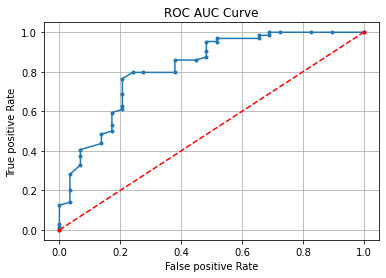

In [234]:
## train scores
rf.fit(xtrain,ytrain)
rf_train_pred = rf.predict(xtrain)
rf_train_acc = accuracy_score(ytrain,rf_train_pred)
rf_train_cm = confusion_matrix(ytrain,rf_train_pred)
rf_train_cr = classification_report(ytrain,rf_train_pred)
print('Train metrics :\n')
print('Train Accuracy score : ',rf_train_acc)
print('\nTrain Conf. Matrix :\n\n',rf_train_cm)
print('\nTrain Class. Report :\n\n',rf_train_cr)
##test scores
rf_test_pred = rf.predict(xtest)
rf_test_pp = rf.predict_proba(xtest)
rf_test_pp = rf_test_pp[:,1]
##plotting ROC_CURVE
fpr,tpr,thresh = roc_curve(ytest,rf_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',color='r',marker='.')
plt.grid()
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC AUC Curve')
rf_test_acc = accuracy_score(ytest,rf_test_pred)
rf_test_cm = confusion_matrix(ytest,rf_test_pred)
rf_test_cr = classification_report(ytest,rf_test_pred)
rf_test_rocauc = roc_auc_score(ytest,rf_test_pp)
print('--'*40,'\n')
print('Test Metrics :\n\n')
print('Test accuracy score : ',rf_test_acc)
print('roc auc score :',rf_test_rocauc)
print('\nTest conf. matrix :\n\n',rf_test_cm)
print('\nTest Class. Report :\n\n',rf_test_cr)

[17:19:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train metrics :

Train Accuracy score :  1.0

Train Conf. Matrix :

 [[163   0]
 [  0 358]]

Train Class. Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       358

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521

-------------------------------------------------------------------------------- 

Test Metrics :


Test accuracy score :  0.7634408602150538
roc auc score : 0.8044181034482759

Test conf. matrix :

 [[18 11]
 [11 53]]

Test Class. Report :

               precision    recall  f1-score   support

      

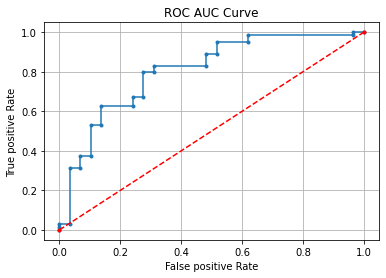

In [235]:
## train scores
xgb.fit(xtrain,ytrain)
xgb_train_pred = xgb.predict(xtrain)
xgb_train_acc = accuracy_score(ytrain,xgb_train_pred)
xgb_train_cm = confusion_matrix(ytrain,xgb_train_pred)
xgb_train_cr = classification_report(ytrain,xgb_train_pred)
print('Train metrics :\n')
print('Train Accuracy score : ',xgb_train_acc)
print('\nTrain Conf. Matrix :\n\n',xgb_train_cm)
print('\nTrain Class. Report :\n\n',xgb_train_cr)
##test scores
xgb_test_pred = xgb.predict(xtest)
xgb_test_pp = xgb.predict_proba(xtest)
xgb_test_pp = xgb_test_pp[:,1]
##plotting ROC_CURVE
fpr,tpr,thresh = roc_curve(ytest,xgb_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',color='r',marker='.')
plt.grid()
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC AUC Curve')
xgb_test_acc = accuracy_score(ytest,xgb_test_pred)
xgb_test_cm = confusion_matrix(ytest,xgb_test_pred)
xgb_test_cr = classification_report(ytest,xgb_test_pred)
xgb_test_rocauc = roc_auc_score(ytest,xgb_test_pp)

print('--'*40,'\n')
print('Test Metrics :\n\n')
print('Test accuracy score : ',xgb_test_acc)
print('roc auc score :',xgb_test_rocauc)
print('\nTest conf. matrix :\n\n',xgb_test_cm)
print('\nTest Class. Report :\n\n',xgb_test_cr)

[17:19:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train metrics :

Train Accuracy score :  0.8330134357005758

Train Conf. Matrix :

 [[ 84  79]
 [  8 350]]

Train Class. Report :

               precision    recall  f1-score   support

           0       0.91      0.52      0.66       163
           1       0.82      0.98      0.89       358

    accuracy                           0.83       521
   macro avg       0.86      0.75      0.77       521
weighted avg       0.85      0.83      0.82       521

-------------------------------------------------------------------------------- 

Test Metrics :


Test accuracy score :  0.7741935483870968
roc auc score : 0.794719827586207

Test conf. matrix :

 [[15 14]
 [ 7 57]]

Test Class. Report :

               precision    recall  f1-score   s

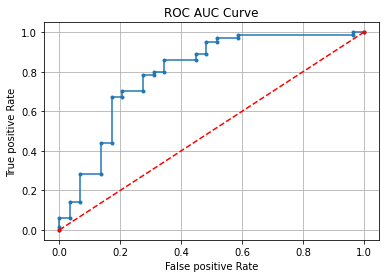

In [236]:
## train scores
xgbrf.fit(xtrain,ytrain)
xgbrf_train_pred = xgbrf.predict(xtrain)
xgbrf_train_acc = accuracy_score(ytrain,xgbrf_train_pred)
xgbrf_train_cm = confusion_matrix(ytrain,xgbrf_train_pred)
xgbrf_train_cr = classification_report(ytrain,xgbrf_train_pred)
print('Train metrics :\n')
print('Train Accuracy score : ',xgbrf_train_acc)
print('\nTrain Conf. Matrix :\n\n',xgbrf_train_cm)
print('\nTrain Class. Report :\n\n',xgbrf_train_cr)
##test scores
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_pp = xgbrf.predict_proba(xtest)
xgbrf_test_pp = xgbrf_test_pp[:,1]
##plotting ROC_CURVE
fpr,tpr,thresh = roc_curve(ytest,xgbrf_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',color='r',marker='.')
plt.grid()
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC AUC Curve')
xgbrf_test_acc = accuracy_score(ytest,xgbrf_test_pred)
xgbrf_test_cm = confusion_matrix(ytest,xgbrf_test_pred)
xgbrf_test_cr = classification_report(ytest,xgbrf_test_pred)
xgbrf_test_rocauc = roc_auc_score(ytest,xgbrf_test_pp)

print('--'*40,'\n')
print('Test Metrics :\n\n')
print('Test accuracy score : ',xgbrf_test_acc)
print('roc auc score :',xgbrf_test_rocauc)
print('\nTest conf. matrix :\n\n',xgbrf_test_cm)
print('\nTest Class. Report :\n\n',xgbrf_test_cr)

Train metrics :

Train Accuracy score :  0.9136276391554703

Train Conf. Matrix :

 [[119  44]
 [  1 357]]

Train Class. Report :

               precision    recall  f1-score   support

           0       0.99      0.73      0.84       163
           1       0.89      1.00      0.94       358

    accuracy                           0.91       521
   macro avg       0.94      0.86      0.89       521
weighted avg       0.92      0.91      0.91       521

-------------------------------------------------------------------------------- 

Test Metrics :


Test accuracy score :  0.7849462365591398
roc auc score : 0.8189655172413793

Test conf. matrix :

 [[15 14]
 [ 6 58]]

Test Class. Report :

               precision    recall  f1-score   support

           0       0.71      0.52      0.60        29
           1       0.81      0.91      0.85        64

    accuracy                           0.78        93
   macro avg       0.76      0.71      0.73        93
weighted avg       0.78   

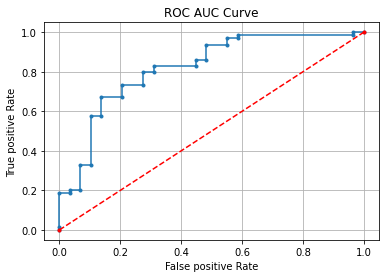

In [237]:
## train scores
cat.fit(xtrain,ytrain)
cat_train_pred = cat.predict(xtrain)
cat_train_acc = accuracy_score(ytrain,cat_train_pred)
cat_train_cm = confusion_matrix(ytrain,cat_train_pred)
cat_train_cr = classification_report(ytrain,cat_train_pred)
print('Train metrics :\n')
print('Train Accuracy score : ',cat_train_acc)
print('\nTrain Conf. Matrix :\n\n',cat_train_cm)
print('\nTrain Class. Report :\n\n',cat_train_cr)
##test scores
cat_test_pred = cat.predict(xtest)
cat_test_pp = cat.predict_proba(xtest)
cat_test_pp = cat_test_pp[:,1]
##plotting ROC_CURVE
fpr,tpr,thresh = roc_curve(ytest,cat_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',color='r',marker='.')
plt.grid()
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC AUC Curve')
cat_test_acc = accuracy_score(ytest,cat_test_pred)
cat_test_cm = confusion_matrix(ytest,cat_test_pred)
cat_test_cr = classification_report(ytest,cat_test_pred)
cat_test_rocauc = roc_auc_score(ytest,cat_test_pp)
print('--'*40,'\n')
print('Test Metrics :\n\n')
print('Test accuracy score : ',cat_test_acc)
print('roc auc score :',cat_test_rocauc)
print('\nTest conf. matrix :\n\n',cat_test_cm)
print('\nTest Class. Report :\n\n',cat_test_cr)

Train metrics :

Train Accuracy score :  0.9980806142034548

Train Conf. Matrix :

 [[162   1]
 [  0 358]]

Train Class. Report :

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       163
           1       1.00      1.00      1.00       358

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521

-------------------------------------------------------------------------------- 

Test Metrics :


Test accuracy score :  0.7634408602150538
roc auc score : 0.8001077586206896

Test conf. matrix :

 [[16 13]
 [ 9 55]]

Test Class. Report :

               precision    recall  f1-score   support

           0       0.64      0.55      0.59        29
           1       0.81      0.86      0.83        64

    accuracy                           0.76        93
   macro avg       0.72      0.71      0.71        93
weighted avg       0.76   

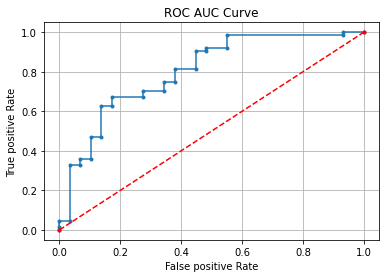

In [238]:
## train scores
lgb.fit(xtrain,ytrain)
lgb_train_pred = lgb.predict(xtrain)
lgb_train_acc = accuracy_score(ytrain,lgb_train_pred)
lgb_train_cm = confusion_matrix(ytrain,lgb_train_pred)
lgb_train_cr = classification_report(ytrain,lgb_train_pred)
print('Train metrics :\n')
print('Train Accuracy score : ',lgb_train_acc)
print('\nTrain Conf. Matrix :\n\n',lgb_train_cm)
print('\nTrain Class. Report :\n\n',lgb_train_cr)
##test scores
lgb_test_pred = lgb.predict(xtest)
lgb_test_pp = lgb.predict_proba(xtest)
lgb_test_pp = lgb_test_pp[:,1]
##plotting ROC_CURVE
fpr,tpr,thresh = roc_curve(ytest,lgb_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',color='r',marker='.')
plt.grid()
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC AUC Curve')
lgb_test_acc = accuracy_score(ytest,lgb_test_pred)
lgb_test_cm = confusion_matrix(ytest,lgb_test_pred)
lgb_test_cr = classification_report(ytest,lgb_test_pred)
lgb_test_rocauc = roc_auc_score(ytest,lgb_test_pp)

print('--'*40,'\n')
print('Test Metrics :\n\n')
print('Test accuracy score : ',lgb_test_acc)
print('roc auc score :',lgb_test_rocauc)
print('\nTest conf. matrix :\n\n',lgb_test_cm)
print('\nTest Class. Report :\n\n',lgb_test_cr)

In [239]:
lr_test_pp = lr_test_pp.tolist()
kn_test_pp = kn_test_pp.tolist()
dt_test_pp = dt_test_pp.tolist()
rf_test_pp = rf_test_pp.tolist()
xgb_test_pp = xgb_test_pp.tolist()
xgbrf_test_pp = xgbrf_test_pp.tolist()
cat_test_pp = cat_test_pp.tolist()
lgb_test_pp = lgb_test_pp.tolist()

In [240]:
mean_proba = pd.DataFrame({'LR':lr_test_pp,'DT':dt_test_pp,'RF':rf_test_pp,'XGB':xgb_test_pp,
            'XGBRF':xgbrf_test_pp,'CAT':cat_test_pp,'LGB':lgb_test_pp})

In [241]:
mean_probas = []
for i in mean_proba.index:
    mean_probas.append(mean_proba.iloc[i].mean())
    

In [242]:
mean_proba['mean_probas'] = lr_test_pp

In [243]:
# mean_proba['mean_probas'] = mean_probas

In [244]:
mean_proba.head()

,LR,DT,RF,XGB,XGBRF,CAT,LGB,mean_probas
0,0.813355,0.0,0.77,0.418083,0.760241,0.751815,0.466606,0.813355
1,0.931248,1.0,0.87,0.950237,0.833991,0.926599,0.943634,0.931248
2,0.522821,1.0,0.47,0.107702,0.697092,0.530976,0.496707,0.522821
3,0.719706,1.0,0.90,0.912326,0.778242,0.858883,0.967863,0.719706
4,0.343192,0.0,0.14,0.013161,0.156718,0.096639,0.081621,0.343192


In [245]:
fpr,tpr,thresh = roc_curve(ytest,mean_proba['mean_probas'])

In [246]:
acc=[]
for i in thresh:
    ypred = np.where(mean_probas>i,1,0)
    acc.append(accuracy_score(ytest,ypred))
    
decider = pd.concat([pd.Series(thresh),pd.Series(acc)],axis=1)
decider.rename(columns = {0: 'Threshold', 1: 'Accuracies'}, inplace = True)
decider.sort_values('Accuracies',ascending=False)

,Threshold,Accuracies
26,0.305919,0.795699
25,0.343192,0.795699
28,0.242000,0.784946
27,0.246899,0.784946
21,0.686083,0.784946
24,0.522821,0.774194
20,0.692612,0.774194
19,0.695613,0.774194
23,0.618716,0.763441
22,0.669990,0.763441


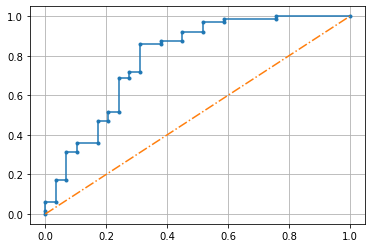

In [247]:
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='-.')
plt.grid()

In [248]:
thresh[26]

0.30591893664922665

In [249]:
thresh

array([1.93318235, 0.93318235, 0.92123694, 0.92032535, 0.89131007,
       0.89043614, 0.8592076 , 0.85526999, 0.84331649, 0.83934681,
       0.80859136, 0.80836386, 0.80092603, 0.80038444, 0.75763534,
       0.75674466, 0.73805284, 0.73194872, 0.70123421, 0.6956131 ,
       0.69261241, 0.68608253, 0.66999042, 0.61871648, 0.52282126,
       0.34319233, 0.30591894, 0.24689885, 0.24199992, 0.07828039])

In [250]:
f = []
for i in mean_proba.mean_probas:
#     print(i)
    if i > thresh[26]:
        f.append(1)
    else:
        f.append(0)

In [251]:
accuracy_score(ytest,f)

0.7956989247311828

[[12 17]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.86      0.41      0.56        29
           1       0.78      0.97      0.87        64

    accuracy                           0.80        93
   macro avg       0.82      0.69      0.71        93
weighted avg       0.81      0.80      0.77        93



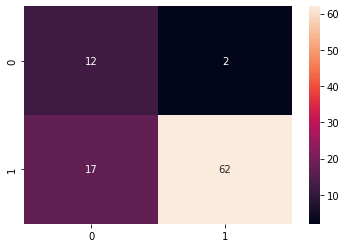

In [252]:
print(confusion_matrix(ytest,f))
sns.heatmap(confusion_matrix(ytest,f).transpose(),annot=True)
print(classification_report(ytest,f))

In [253]:
# print(f)

In [254]:
# print(ytest.tolist())

### Test data

In [263]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban


In [264]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 37.3+ KB


### Imputing null

In [265]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [266]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban


In [268]:
ids = test['Loan_ID']

In [269]:
test.drop('Loan_ID',axis=1,inplace=True)

In [270]:
test['Total_family_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

In [271]:
fi = []
for i in test['Total_family_income']:
    if i < 5416:
        fi.append('Poor')
    elif 5416<=i<7024:
        fi.append('MiddleClass')
    elif i >= 7024:
        fi.append('Rich')

In [272]:
test['Total_family_income_Category'] = fi

In [273]:
test['Total_family_income_Category'].value_counts()

Poor           199
Rich            91
MiddleClass     77
Name: Total_family_income_Category, dtype: int64

### Preprocessing data

In [274]:
test['Dependents'] = test.Dependents.astype(str)

In [275]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_family_income,Total_family_income_Category
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,5720.0,MiddleClass
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,4576.0,Poor
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,6800.0,MiddleClass
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,4886.0,Poor
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,3276.0,Poor


In [276]:
gen = []
for i in test.Gender:
    if i == 'Male':
        gen.append(1)
    else:
        gen.append(0)
test['Gender'] = gen

mar = []
for i in test.Married:
    if i == 'Yes':
        mar.append(1)
    else:
        mar.append(0)
test['Married'] = mar

edu = []
for i in test.Education:
    if i == 'Graduate':
        edu.append(1)
    else:
        edu.append(0)
test['Education'] = edu

se = []
for i in test.Self_Employed:
    if i == 'Graduate':
        se.append(1)
    else:
        se.append(0)
test['Self_Employed'] = se



tfi =[]
for i in test.Total_family_income_Category:
    if i == 'Poor':
        tfi.append(1)
    elif i == 'Rich':
        tfi.append(2)
    elif i == 'MiddleClass':
        tfi.append(3)
test['Total_family_income_Category'] = tfi

test.Property_Area.value_counts()

pa = []
for i in test.Property_Area:
    if i == 'Semiurban':
        pa.append(1)
    elif i == 'Urban':
        pa.append(2)
    elif i == 'Rural':
        pa.append(3)
test['Property_Area'] = pa


dp = []
for i in test.Dependents:
    if i == '0':
        dp.append(0)
    elif i  == '1':
        dp.append(1)
    elif i == '2':
        dp.append(2)
    elif i == '3+':
        dp.append(3)
test['Dependents'] = dp

In [277]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_family_income,Total_family_income_Category
0,1,1,0,1,0,5720,0.0,110.0,360.0,1.0,2,5720.0,3
1,1,1,1,1,0,3076,1500.0,126.0,360.0,1.0,2,4576.0,1
2,1,1,2,1,0,5000,1800.0,208.0,360.0,1.0,2,6800.0,3
3,1,1,2,1,0,2340,2546.0,100.0,360.0,1.0,2,4886.0,1
4,1,0,0,0,0,3276,0.0,78.0,360.0,1.0,2,3276.0,1


In [278]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        367 non-null    int64  
 1   Married                       367 non-null    int64  
 2   Dependents                    367 non-null    int64  
 3   Education                     367 non-null    int64  
 4   Self_Employed                 367 non-null    int64  
 5   ApplicantIncome               367 non-null    int64  
 6   CoapplicantIncome             367 non-null    float64
 7   LoanAmount                    367 non-null    float64
 8   Loan_Amount_Term              367 non-null    float64
 9   Credit_History                367 non-null    float64
 10  Property_Area                 367 non-null    int64  
 11  Total_family_income           367 non-null    float64
 12  Total_family_income_Category  367 non-null    int64  
dtypes: fl

In [279]:
final_threshold = thresh[26]
final_threshold

0.30591893664922665

In [280]:
lr.fit(x,y)
kn.fit(x,y)
dt.fit(x,y)
rf.fit(x,y)
xgb.fit(x,y)
xgbrf.fit(x,y)
cat.fit(x,y)
lgb.fit(x,y)

[17:20:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LGBMClassifier()

In [281]:
lr_final_proba = lr.predict_proba(test)[:,1]
dt_final_proba = dt.predict_proba(test)[:,1]
rf_final_proba = rf.predict_proba(test)[:,1]
xgb_final_proba = xgb.predict_proba(test)[:,1]
xgbrf_final_proba = xgbrf.predict_proba(test)[:,1]
kn_final_proba = kn.predict_proba(test)[:,1]
cat_final_proba = cat.predict_proba(test)[:,1]
lgb_final_proba = lgb.predict_proba(test)[:,1]

In [282]:
final_probas = pd.DataFrame({'lr':lr_final_proba,'kn':kn_final_proba,'dt':dt_final_proba,'rf':rf_final_proba,
                            'xgb':xgb_final_proba,'xgbrf':xgbrf_final_proba,'cat':cat_final_proba,'lgb':lgb_final_proba})

In [283]:
final_probas.head()

,lr,kn,dt,rf,xgb,xgbrf,cat,lgb
0,0.905661,1.0,1.0,0.90,0.927602,0.757194,0.826334,0.962981
1,0.795692,0.8,1.0,0.86,0.799709,0.827969,0.837593,0.831683
2,0.826743,0.4,1.0,0.81,0.921883,0.753048,0.841922,0.875888
3,0.763528,1.0,1.0,0.80,0.930506,0.836275,0.899272,0.927098
4,0.676063,1.0,1.0,0.55,0.179821,0.772550,0.623271,0.377239


In [284]:
fp = []
for i in final_probas.index:
    fp.append(final_probas.iloc[i].mean())

In [285]:
final_probas['mean_final'] = fp

In [286]:
final_probas.head()

,lr,kn,dt,rf,xgb,xgbrf,cat,lgb,mean_final
0,0.905661,1.0,1.0,0.90,0.927602,0.757194,0.826334,0.962981,0.909971
1,0.795692,0.8,1.0,0.86,0.799709,0.827969,0.837593,0.831683,0.844081
2,0.826743,0.4,1.0,0.81,0.921883,0.753048,0.841922,0.875888,0.803686
3,0.763528,1.0,1.0,0.80,0.930506,0.836275,0.899272,0.927098,0.894585
4,0.676063,1.0,1.0,0.55,0.179821,0.772550,0.623271,0.377239,0.647368


In [287]:
final_predictiosn = []
for i in final_probas.mean_final:
    if i > final_threshold:
        final_predictiosn.append(1)
    else:
        final_predictiosn.append(0)

In [288]:
final_df = pd.DataFrame({'Loan_ID':ids,'Loan_Status':final_predictiosn})

In [289]:
decodes = []
for i in final_df.Loan_Status:
    if i  == 1:
        decodes.append('Y')
    else:
        decodes.append('N')

In [291]:
final_df['Loan_Status'] = decodes

In [292]:
final_df.Loan_Status.value_counts()

Y    313
N     54
Name: Loan_Status, dtype: int64

### Saving .csv

In [293]:
final_df.to_csv('exp_02.csv',index=False)

In [294]:
final_df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [295]:
# pd.read_csv('sample_submission_49d68Cx.csv')